In [455]:
from DIP import Image

## 原始图像 Original Image

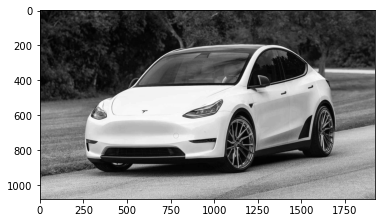

In [457]:
I = Image(imgPath='tesla.jpeg')
I.showImage()

## 运动模糊 Motion Blur

$$g(x, y)=\int_0^T f\left[x-x_0(t), y-y_0(t)\right] \mathrm{d} t + \eta(x, y) \quad \Leftrightarrow \quad G(u, v)=H(u, v) F(u, v) +  N(x, y)$$

where $H(u, v)=\int_0^T \mathrm{e}^{-\mathrm{j} 2 \pi\left[u x_0(t)+v y_0(t)\right]} \mathrm{d} t$

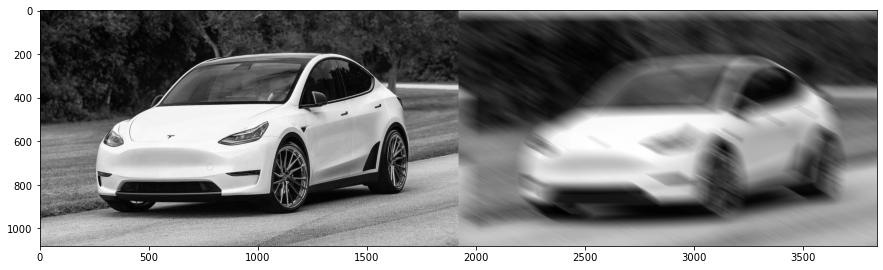

In [458]:
MB = I.Blur(guassianNoiseSigma=0.00, type='MotionBlur')
MB.showImage(cat=[I])

## 大气扰动模糊 Turbulence Blur
$$H(u, v)=e^{-k\left(u^2+v^2\right)^{5 / 6}}$$

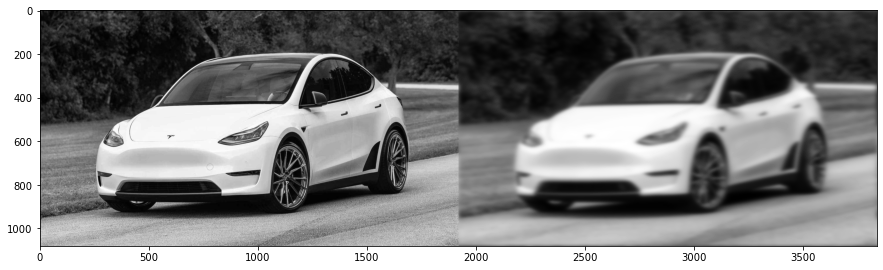

In [459]:
TB = I.Blur(guassianNoiseSigma=0, type='TurbulenceBlur')
TB.showImage(cat=[I])

## 逆滤波
## Inverse Filter

$$\hat{F}(u, v)=\frac{G(u, v)}{H(u, v)} = F(u, v) + \frac{N(u, v)}{H(u, v)}$$

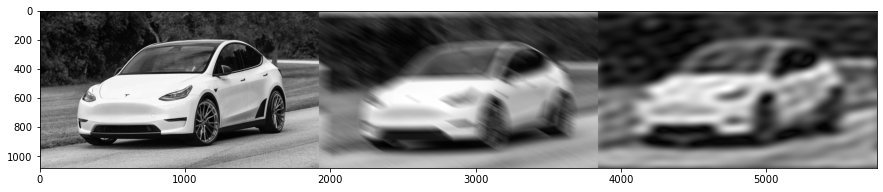

In [464]:
# MB - Motion Blured Image
MB = I.Blur(guassianNoiseSigma=0.00, type='MotionBlur')
# IMB - Inverse Filtering Motion Blurred Image
IMB = MB.InverseFilter(radius=14, type='MotionBlur')
IMB.showImage(cat=[I, MB])

In [461]:
# TB - Turbulence Blured Image
# ITB = TB.InverseFilter(radius=120, type='TurbulenceBlur', k=.0025)
# ITB.showImage(cat=[I, TB])

## （维纳）最小均方误差滤波
## (Wiener) Minimum Mean Square Error Filter

Target:

$$
\hat{f} = \argmin_{\hat{f}} \{e^2\}= \argmin_{\hat{f}} E\left\{(f-\hat{f})^2\right\}
$$

Solution: 
$$
\begin{aligned}
\hat{F}(u, v) &=\left[\frac{H^*(u, v) S_f(u, v)}{S_f(u, v)|H(u, v)|^2+S_\eta(u, v)}\right] G(u, v) \\
&=\left[\frac{H^*(u, v)}{|H(u, v)|^2+S_\eta(u, v) / S_f(u, v)}\right] G(u, v) \\
&=\left[\frac{1}{H(u, v)} \frac{|H(u, v)|^2}{|H(u, v)|^2+S_\eta(u, v) / S_f(u, v)}\right] G(u, v)
\end{aligned}
$$

Approximation:
$$
\hat{F}(u, v)=\left[\frac{1}{H(u, v)} \frac{|H(u, v)|^2}{|H(u, v)|^2+K}\right] G(u, v)
$$


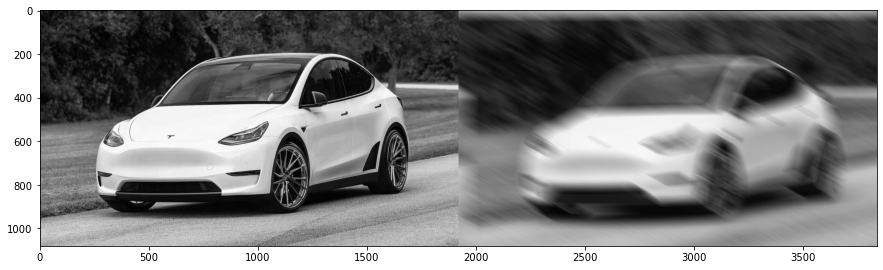

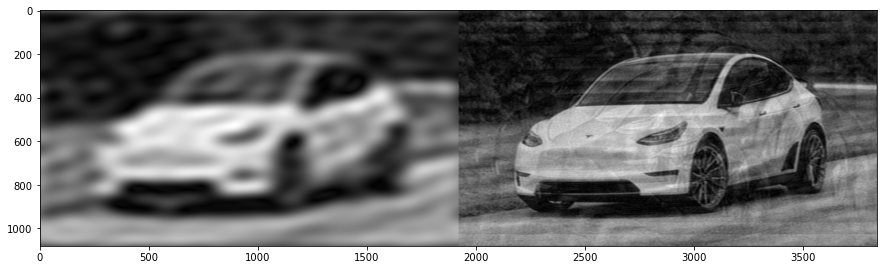

In [462]:
B = I.Blur(guassianNoiseSigma=0.01, type='MotionBlur')
B.showImage(cat=[I])

IB = B.InverseFilter(radius=14, type='MotionBlur')
WB = B.WienerFilter(radius=120, K=0.0005, type='MotionBlur')
WB.showImage(cat=[IB])

## 约束最小二乘滤波
## Constrained Least Square Filtering

gamma=[0.4626810550689697,0.4634261131286621], eta_square=121352255.99999999, r_square=121352320.80301048


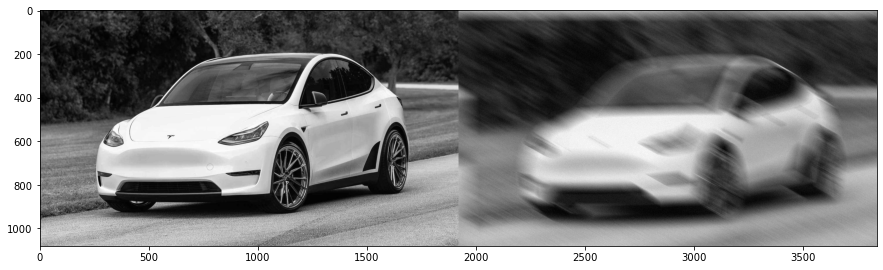

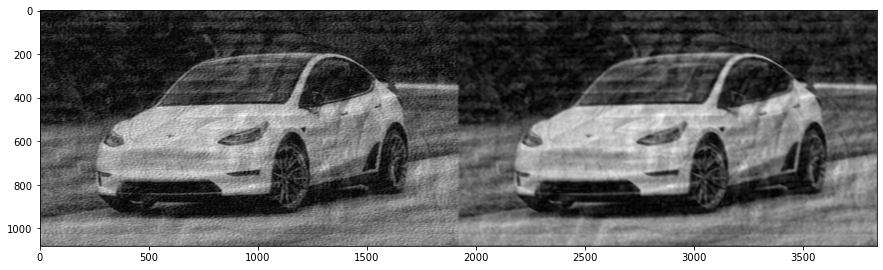

In [463]:
B = I.Blur(guassianNoiseSigma=0.03, type='MotionBlur')
B.showImage(cat=[I])

WB = B.WienerFilter(radius=120, K=0.0005, type='MotionBlur')
CLSB = B.CLSFilter(gamma = 1e5, maxInteration = 500, type = 'MotionBlur')
CLSB.showImage(cat=[WB])